**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

- __ID__ - Уникальный номер спортсмена
- __Name__ - ФИО спортсмена
- __Sex__ - Пол: M or F - Мужчина или женщина
- __Age__ - Возраст спортсмена
- __Height__ - Рост в см.
- __Weight__ - Вес в кг.
- __Team__ - Название команды
- __NOC__ - 3-буквенный код Национального олимпийского комитета
- __Games__ - Год и сезон проведения олимпиады, напр: Summer 2000 или Winter 2000
- __Year__ - Год проведения олимпиады
- __Season__ - Сезон проведения олимпиады: Summer, Winter
- __City__ - Город проведения олимпиады
- __Sport__ - Название вида спорта
- __Event__ - Название мероприятия
- __Medal__ - Медаль: Gold, Silver, Bronze, or NA

## 1.2 Загрузка данных общее описание набора данных

In [2]:
PATH = 'https://github.com/aksenov7/Kaggle_competition_group/blob/master/athlete_events.csv.zip?raw=true'
df = pd.read_csv(PATH, compression='zip')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(271116, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


- Видим большое кол-во пропусков Medal, но будем считать, что это люди, которые не получили медаль.
- Что более существенно, так это пропуски по Weight, Height, Age


In [5]:
df.Sex.value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

In [6]:
df.Sex.value_counts(normalize=True)

M    0.7251
F    0.2749
Name: Sex, dtype: float64

Видим преобладание мужского пола

In [7]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.0000,261642.0000,210945.0000,208241.0000,271116.0000
mean,68248.9544,25.5569,175.3390,70.7024,1978.3785
std,39022.2863,6.3936,10.5185,14.3480,29.8776
min,1.0000,10.0000,127.0000,25.0000,1896.0000
25%,34643.0000,21.0000,168.0000,60.0000,1960.0000
50%,68205.0000,24.0000,175.0000,70.0000,1988.0000
75%,102097.2500,28.0000,183.0000,79.0000,2002.0000
max,135571.0000,97.0000,226.0000,214.0000,2016.0000


**Первичные выводы по числовым данным**
* Возраст людей в выборке от 10 до 97 лет. В среднем возраст варьируется от 19 до 32 лет. Младшие 21 покрывают 25%, 21-28 летние 50%. Остальные 25% это люди от 28 до 97.
* Рост от 127 до 226 см. В среднем 175. СКО = 10.
* Вес от 25 до 214 кг. В среднем 70.7 кг.
* Год проведения лучше рассмотреть отдельно. Но можно сказать, что данные приведены с 1896-2016г.

In [8]:
df.describe(include=object)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


**Первичные выводы по строковым данным**
* 1184 уникальных команд. Самыми активными являются United States - они поучаствовали в 17847 соревнованиях.
* Самым же активным спортсменом является Robert Tail McKenzie - 58 участий.
* Самой популярной игрой является 2000 Summer - 13821 участников.
* В выборке преобладают мужчины - 72.5%.
* Как уже говорилось. Больше всего игр проводятся летом - 82%.
* Самым популярным видом спорта является Athletics - 38624 человека.
* Самый популярный Event - Football Men's Football. Всего различных ивентов - 765.

### Медали:
Теперь посмотрим на медалистов

In [9]:
golds = df[(df['Medal'] == 'Gold')]
golds.Team.describe(include=object)

count             13372
unique              242
top       United States
freq               2474
Name: Team, dtype: object

* United States выигрывали золото чаще других.

In [10]:
df.groupby('Medal').describe(include=object)['Name']

,count,unique,top,freq
Medal,,,,
Bronze,13295,11867,Heikki Ilmari Savolainen,6
Gold,13372,10413,"Michael Fred Phelps, II",23
Silver,13116,11430,Mikhail Yakovlevich Voronin,6


* Больше всего Gold получал Michael Fred Phelps, II - 23 раза.
* Silver - Mikhail Yakovlevich Voronin - 6 раз.
* Bronze - Heikki Ilmari Savolainen - 6 раз.

In [11]:
df.groupby('Medal').describe(include=object)['Team']

,count,unique,top,freq
Medal,,,,
Bronze,13295,268,United States,1233
Gold,13372,242,United States,2474
Silver,13116,273,United States,1512


* United States получали медали чаще остальных. И почти половина из них Gold

In [12]:
no_medal = df[df['Medal'].isna()]
no_medal.describe(include=object)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,231333,231333,231333,231333,231333,231333,231333,231333,231333,0
unique,120401,2,932,230,51,2,42,60,723,0
top,Robert Tait McKenzie,M,United States,USA,1996 Summer,Summer,London,Athletics,Football Men's Football,NaN
freq,57,168064,12628,13216,11938,188464,18802,34655,4464,NaN


* United States не получали медали чаще остальных.
* Robert Tait McKenzie не получал медали чаще остальных - 57 раз.

## 1.3 Визуальный и статистический анализ данных

<AxesSubplot:xlabel='Age', ylabel='Count'>

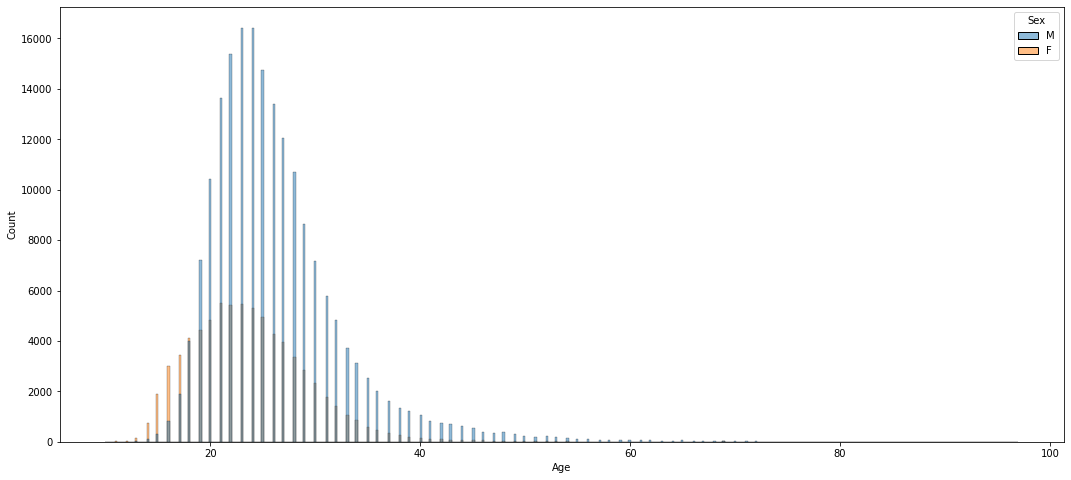

In [13]:
#Кол-во мужчин и женщин по возрасту
plt.figure(figsize=(18,8))
sns.histplot(data=df, x='Age', hue='Sex')

* Распределение нормальное, что и можно было ожидать.
* Видно, что более молодых женщин (до 18 лет) больше, чем мужчин.

### По годам

<AxesSubplot:xlabel='Year'>

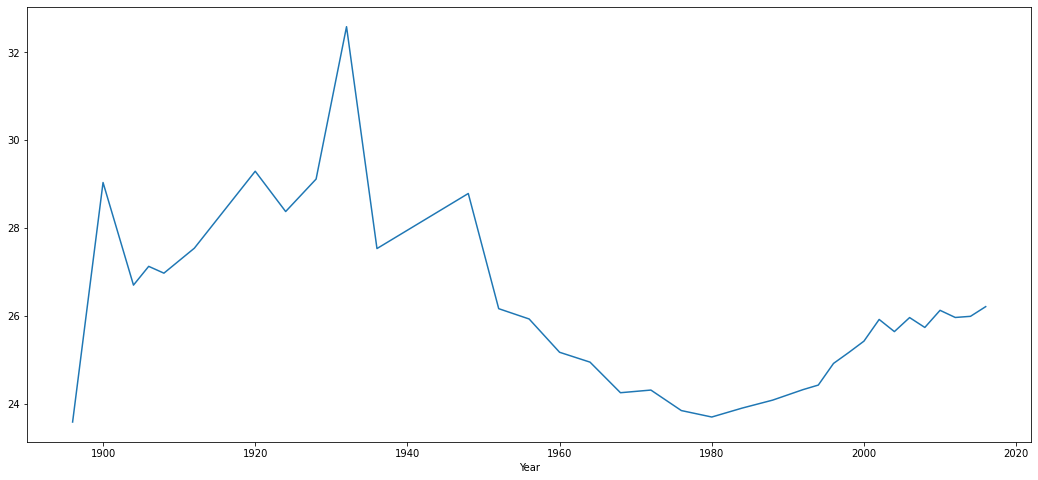

In [14]:
#Средний возраст по годам
gr = df.groupby('Year').mean()
plt.figure(figsize=(18,8))
gr['Age'].plot()

Из графика видно, что ранее 195-ых в основном преобладали люди с возрастом ~28, к 1980 году средний возраст упал до 24, а потом опять начал расти.

<AxesSubplot:xlabel='Year', ylabel='Count'>

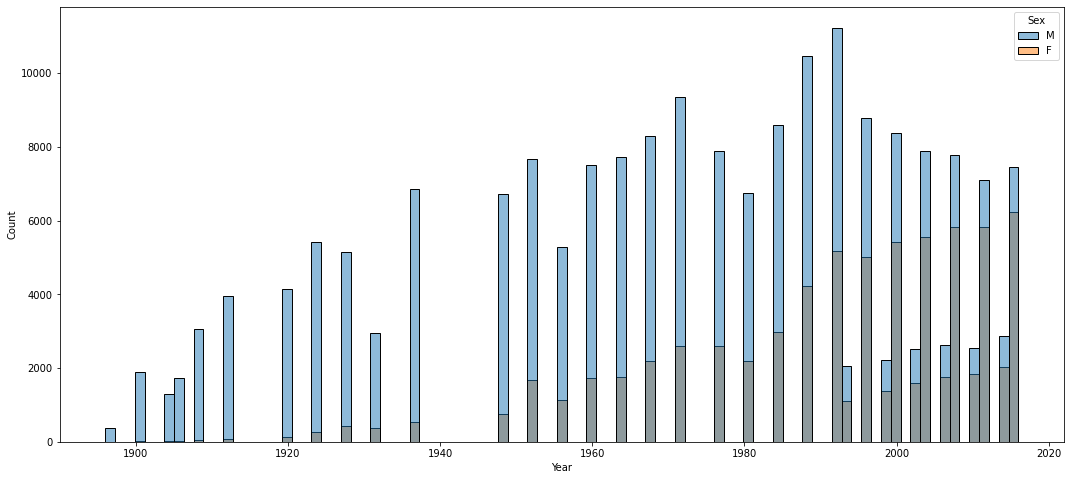

In [251]:
#Кол-во мужчин и женщин по годам
silver = df
plt.figure(figsize=(18,8))
sns.histplot(x="Year", hue="Sex", data=df)

### По времени года

<AxesSubplot:xlabel='Year', ylabel='count'>

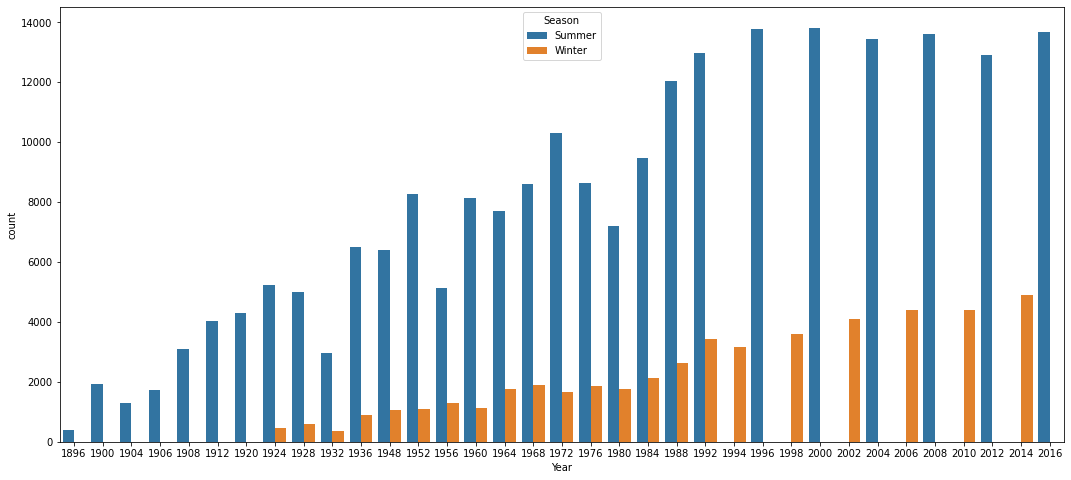

In [16]:
#Кол-во мужчин и женщин с Gold по возрасту
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Year', hue='Season')

Зимние виды спорта проводятся реже. А до 1924 они вообще не проводились.

### Корреляции

In [17]:
df.corr()

,ID,Age,Height,Weight,Year
ID,1.0000,-0.0036,-0.0111,-0.0092,0.0119
Age,-0.0036,1.0000,0.1382,0.2121,-0.1151
Height,-0.0111,0.1382,1.0000,0.7962,0.0476
Weight,-0.0092,0.2121,0.7962,1.0000,0.0191
Year,0.0119,-0.1151,0.0476,0.0191,1.0000


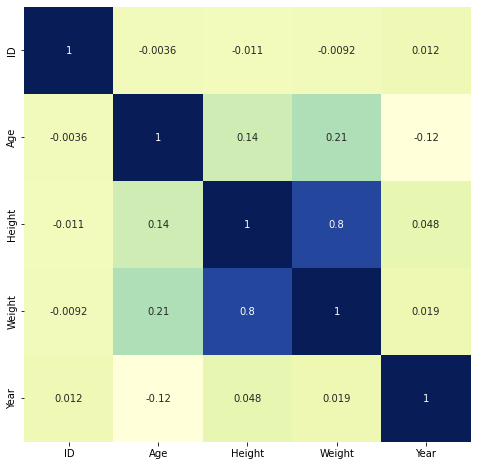

In [18]:
# Посмотрим на тепловую карту
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", cbar=False);

* Коэф. корреляции между Height и Weight равен 0.8, что ожидаемо
* Также немного коррелируют между собой Age и Height или Weight
* Остальные данные вообще не коррелируют между собой

<AxesSubplot:xlabel='Height', ylabel='Weight'>

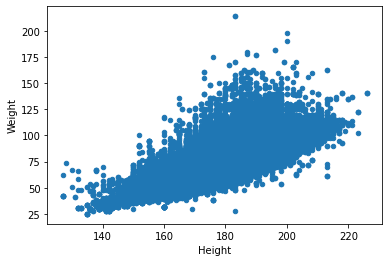

In [19]:
df.plot.scatter(x='Height', y='Weight')

Team
United States      5219
Soviet Union       2451
Germany            1984
Great Britain      1673
France             1550
                   ... 
United States-1     101
Nigeria              99
Turkey               95
Serbia               85
Kazakhstan           77
Name: count, Length: 50, dtype: object

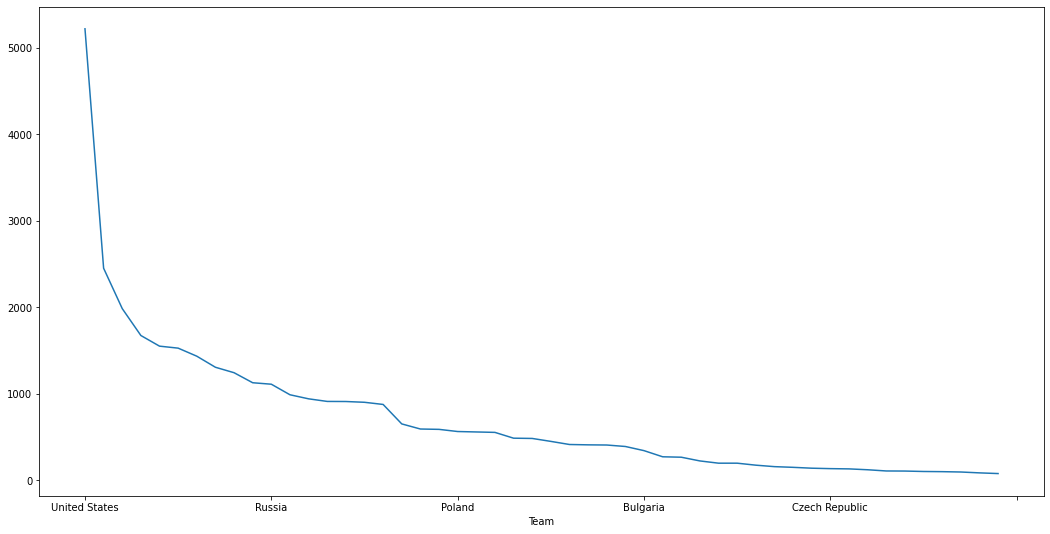

In [234]:
# Количество медалей по командам
plt.figure(figsize=(18,9))
medals = df.groupby('Team')['Medal'].describe(include=object)['count'].sort_values(ascending=False)[:50]
medals.plot()
medals

Количество полученных медалей 50 лучших команд.
Видно, что United States получили больше всех - 5219, а второе место аж в два раза меньше - 2451.

## Интересные факты
* Возраст самого старого спортсмена 97 лет
* Возраст самого молодого - 10 лет
* Наименьший вес спортсмена - 25 кг
* Раньше спортсменок почти не было, но к настоящему моменту наблюдается тенденция равного кол-ва мужчин и женщин
* До 1992 года олимпиады проводились каждые 4 года, но начиная с 1992 стали проводить их каждые 2 года, причем каждая вторая олимпиада была менее "масштабной".
* United States выигрывали медали 5219 раз. Это более чем в два раза больше следующей по счету команды.